In [1]:
import pandas as pd

df = pd.read_parquet('detection_results_validation.parquet')
df

,filename,classid,score,x1,y1,x2,y2
0,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.971191,20,99,336,604
1,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.963867,342,0,664,609
2,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.945312,698,166,1008,864
3,/workspace/yolo_v8_training/oiv7_full/validati...,1,0.931641,496,0,587,86
4,/workspace/yolo_v8_training/oiv7_full/validati...,1,0.916992,50,91,123,185
...,...,...,...,...,...,...,...
142674,/workspace/yolo_v8_training/oiv7_full/validati...,3,0.865234,317,273,347,319
142675,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.922852,209,467,280,578
142676,/workspace/yolo_v8_training/oiv7_full/validati...,1,0.859863,213,464,253,501
142677,/workspace/yolo_v8_training/oiv7_full/validati...,2,0.640625,265,493,284,510


In [2]:
# Mapping of values
mapping = {0: 'person', 1: 'head', 2: 'hand', 3: 'face'}

# Apply the mapping
df['label'] = df['classid'].map(mapping)

# List of values to filter by
filter_list = ['person']

# Filtering the DataFrame
df = df[df['label'].isin(filter_list)]


df

,filename,classid,score,x1,y1,x2,y2,label
0,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.971191,20,99,336,604,person
1,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.963867,342,0,664,609,person
2,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.945312,698,166,1008,864,person
13,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.889648,740,0,956,261,person
14,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.941406,213,0,1020,666,person
...,...,...,...,...,...,...,...,...
142662,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.958496,13,9,728,1024,person
142667,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.889160,371,445,421,593,person
142669,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.789551,268,124,300,148,person
142672,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.941895,242,252,374,576,person


In [3]:
# Convert bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2
df['w'] = df['x2'] - df['x1']
df['h'] = df['y2'] - df['y1']

<ipython-input-3-c7aa782e3a38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cx'] = (df['x1'] + df['x2']) / 2
<ipython-input-3-c7aa782e3a38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cy'] = (df['y1'] + df['y2']) / 2
<ipython-input-3-c7aa782e3a38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [4]:
df = df[['filename', 'score', 'cx', 'cy', 'w', 'h', 'label']]

In [5]:
df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)


<ipython-input-5-c4fa5e68eac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)


In [6]:
df

,filename,score,col_x,row_y,width,height,label
0,/workspace/yolo_v8_training/oiv7_full/validati...,0.971191,178.0,351.5,316,505,person
1,/workspace/yolo_v8_training/oiv7_full/validati...,0.963867,503.0,304.5,322,609,person
2,/workspace/yolo_v8_training/oiv7_full/validati...,0.945312,853.0,515.0,310,698,person
13,/workspace/yolo_v8_training/oiv7_full/validati...,0.889648,848.0,130.5,216,261,person
14,/workspace/yolo_v8_training/oiv7_full/validati...,0.941406,616.5,333.0,807,666,person
...,...,...,...,...,...,...,...
142662,/workspace/yolo_v8_training/oiv7_full/validati...,0.958496,370.5,516.5,715,1015,person
142667,/workspace/yolo_v8_training/oiv7_full/validati...,0.889160,396.0,519.0,50,148,person
142669,/workspace/yolo_v8_training/oiv7_full/validati...,0.789551,284.0,136.0,32,24,person
142672,/workspace/yolo_v8_training/oiv7_full/validati...,0.941895,308.0,414.0,132,324,person


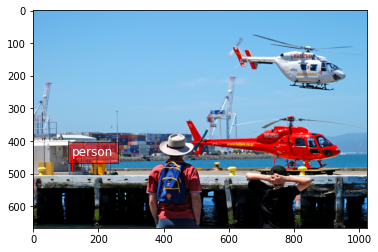

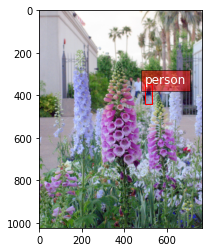

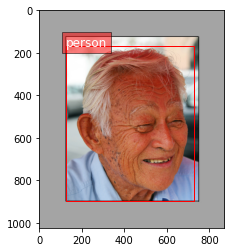

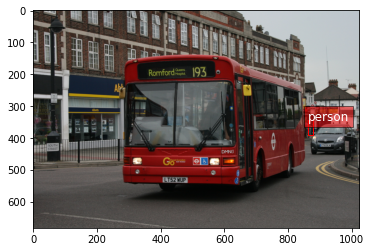

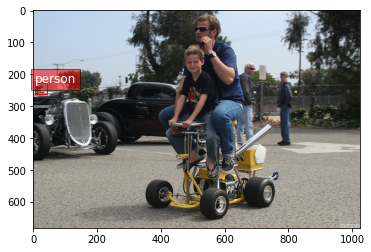

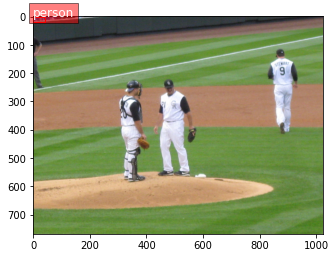

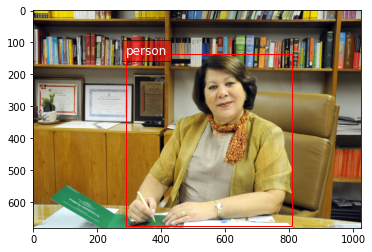

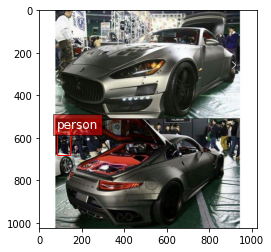

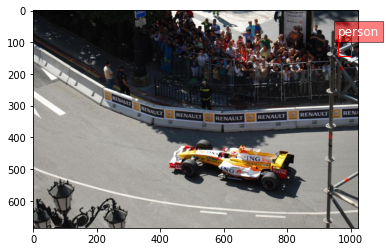

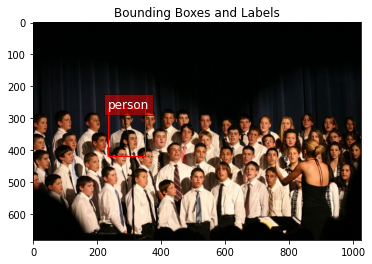

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df_check = df.sample(10)

for index, row in df_check.iterrows():
    fig, ax = plt.subplots()
    # Assuming all images have the same dimensions for this example
    # Adjust accordingly if they differ
    # image_width = 1024
    # image_height = 1024
    # ax.set_xlim(0, image_width)
    # ax.set_ylim(0, image_height)
    # ax.invert_yaxis()  # Invert y axis to match image coordinates


    # Calculate the bottom left corner of the bounding box
    x = row['col_x'] - row['width'] / 2
    y = row['row_y'] - row['height'] / 2
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), row['width'], row['height'], linewidth=1, edgecolor='r', facecolor='none', label=row['label'])
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    # Add label
    plt.text(x, y, row['label'], color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    img = plt.imread(row['filename'])
    ax.imshow(img)

plt.title('Bounding Boxes and Labels')
plt.show()

In [8]:
df

,filename,score,col_x,row_y,width,height,label
0,/workspace/yolo_v8_training/oiv7_full/validati...,0.971191,178.0,351.5,316,505,person
1,/workspace/yolo_v8_training/oiv7_full/validati...,0.963867,503.0,304.5,322,609,person
2,/workspace/yolo_v8_training/oiv7_full/validati...,0.945312,853.0,515.0,310,698,person
13,/workspace/yolo_v8_training/oiv7_full/validati...,0.889648,848.0,130.5,216,261,person
14,/workspace/yolo_v8_training/oiv7_full/validati...,0.941406,616.5,333.0,807,666,person
...,...,...,...,...,...,...,...
142662,/workspace/yolo_v8_training/oiv7_full/validati...,0.958496,370.5,516.5,715,1015,person
142667,/workspace/yolo_v8_training/oiv7_full/validati...,0.889160,396.0,519.0,50,148,person
142669,/workspace/yolo_v8_training/oiv7_full/validati...,0.789551,284.0,136.0,32,24,person
142672,/workspace/yolo_v8_training/oiv7_full/validati...,0.941895,308.0,414.0,132,324,person


In [9]:
df.to_parquet('fd_annots.parquet')